In [37]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm

In [2]:
#read in csv files for project
flights_df = pd.read_csv('flights.csv', low_memory=False)
airlines_df = pd.read_csv('airlines.csv', low_memory=False)

In [3]:
#view first 5 rows of flights_df
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#view all airlines in airlines_df
airlines_df.head(20)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
#view columns and types of flights_df
len(flights_df)
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
#combine 'YEAR', 'MONTH', 'DAY' columns to a single 'DATE' column that is a datetime format 
#and drop 'YEAR', 'MONTH', 'DAY' columns
flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']])
flights_df = flights_df.drop(['YEAR', 'MONTH', 'DAY'], axis=1)

In [7]:
#view first 5 rows to confirm 'DATE' column is in place
flights_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [8]:
#re-order columns to make 'DATE' the first column
new_order = ['DATE', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [9]:
#view new order of columns in the last 5 rows
flights_df = flights_df[new_order]
flights_df.tail()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015-12-31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,320.0,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015-12-31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,227.0,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015-12-31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,221.0,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015-12-31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,161.0,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015-12-31,4,B6,839,JFK,BQN,2359,14.0,15.0,221.0,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#confirm 'DATE' column is datetime
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   DAY_OF_WEEK          int64         
 2   AIRLINE              object        
 3   FLIGHT_NUMBER        int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   DEPARTURE_TIME       float64       
 8   DEPARTURE_DELAY      float64       
 9   SCHEDULED_TIME       float64       
 10  ELAPSED_TIME         float64       
 11  DISTANCE             int64         
 12  SCHEDULED_ARRIVAL    int64         
 13  ARRIVAL_TIME         float64       
 14  ARRIVAL_DELAY        float64       
 15  DIVERTED             int64         
 16  CANCELLED            int64         
 17  CANCELLATION_REASON  object        
 18  AIR_SYSTEM_DELAY     float64       
 19  SECURITY_DELAY       

In [11]:
#slice flights_df to third quarter from '2015-09-01' to '2015-12-31'
third_quarter = flights_df[(flights_df['DATE'] >= "2015-09-01") & (flights_df['DATE'] <= "2015-12-31")]

In [12]:
#view length of third_quarter
length_of_column = len(third_quarter['ORIGIN_AIRPORT'])
length_of_column

1898313

In [13]:
#confirming length of third_quarter
third_quarter['ORIGIN_AIRPORT'].value_counts().sum()

1898313

In [14]:
#created a for loop to convert 'ORIGIN AIRPORT' column from string type to numeric
for column in third_quarter.columns:
    if column == 'ORIGIN_AIRPORT' and isinstance(third_quarter['ORIGIN_AIRPORT'].dtype, str):
        third_quarter['ORIGIN_AIRPORT'] = pd.to_numeric(third_quarter['ORIGIN_AIRPORT'], errors='coerce')

In [15]:
#visualizing 'ORIGIN AIRPORT' column value counts for each airline
third_quarter['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL      93259
ORD      77820
DFW      60542
DEN      52490
LAX      51003
         ...  
10165        9
14222        9
HYA          8
13502        6
11503        4
Name: count, Length: 618, dtype: int64

In [16]:
#view info for third_quarter df
third_quarter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898313 entries, 3920766 to 5819078
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   DAY_OF_WEEK          int64         
 2   AIRLINE              object        
 3   FLIGHT_NUMBER        int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   DEPARTURE_TIME       float64       
 8   DEPARTURE_DELAY      float64       
 9   SCHEDULED_TIME       float64       
 10  ELAPSED_TIME         float64       
 11  DISTANCE             int64         
 12  SCHEDULED_ARRIVAL    int64         
 13  ARRIVAL_TIME         float64       
 14  ARRIVAL_DELAY        float64       
 15  DIVERTED             int64         
 16  CANCELLED            int64         
 17  CANCELLATION_REASON  object        
 18  AIR_SYSTEM_DELAY     float64       
 19  SECURITY_DELAY      

In [17]:
#pulling only rows that have more than 1 diverted flight
third_quarter.loc[third_quarter['DIVERTED'] >= 1]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3922722,2015-09-01,2,AA,1318,SJC,DFW,710,707.0,-3.0,214.0,...,1749.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3927244,2015-09-01,2,WN,577,MCO,BDL,1135,1526.0,231.0,160.0,...,2039.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3927332,2015-09-01,2,EV,4281,PIT,IAH,1140,1134.0,-6.0,194.0,...,1514.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3929666,2015-09-01,2,OO,5622,ORD,BDL,1400,1357.0,-3.0,131.0,...,2011.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3930139,2015-09-01,2,B6,445,SWF,MCO,1435,1425.0,-10.0,168.0,...,1916.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,2015-12-31,4,UA,1291,LIH,LAX,1405,1901.0,296.0,336.0,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5815052,2015-12-31,4,EV,2785,DFW,BRO,1530,1555.0,25.0,110.0,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5816657,2015-12-31,4,UA,291,IAD,SMF,1735,1740.0,5.0,351.0,...,2216.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5817342,2015-12-31,4,MQ,3060,DFW,FAR,1830,1840.0,10.0,163.0,...,2250.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#pulling only rows that have more than 1 cancelled flight
third_quarter.loc[third_quarter['CANCELLED'] >= 1]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920818,2015-09-01,2,B6,768,PSE,MCO,334,NaN,NaN,174.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921026,2015-09-01,2,WN,121,FLL,ATL,540,NaN,NaN,115.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921129,2015-09-01,2,OO,5218,IDA,DEN,550,NaN,NaN,95.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921570,2015-09-01,2,OO,6420,PSP,DEN,605,NaN,NaN,133.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3921665,2015-09-01,2,AS,41,ANC,BET,615,611.0,-4.0,74.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015-12-31,4,UA,1789,IAH,TPA,1955,NaN,NaN,125.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015-12-31,4,UA,222,SFO,LAX,2000,NaN,NaN,96.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015-12-31,4,AA,2245,MIA,SAN,2019,NaN,NaN,337.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015-12-31,4,NK,416,FLL,IAG,2155,NaN,NaN,175.0,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [19]:
#pulling only rows that have a departure delay of greater than 15 minutes
third_quarter.loc[third_quarter['DEPARTURE_DELAY'] >= 15]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2015-09-01,2,NK,298,LAS,IAH,3,110.0,67.0,177.0,...,600.0,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920774,2015-09-01,2,AA,448,SLC,CLT,15,52.0,37.0,234.0,...,636.0,27.0,0,0,NaN,0.0,0.0,0.0,27.0,0.0
3920798,2015-09-01,2,AA,1051,SFO,DFW,59,127.0,28.0,199.0,...,637.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
3920806,2015-09-01,2,AA,480,ANC,PHX,125,249.0,84.0,329.0,...,920.0,86.0,0,0,NaN,2.0,0.0,0.0,84.0,0.0
3920812,2015-09-01,2,UA,1917,SJU,EWR,200,321.0,81.0,250.0,...,705.0,55.0,0,0,NaN,0.0,0.0,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819051,2015-12-31,4,AS,28,SEA,MSP,2355,11.0,16.0,192.0,...,535.0,28.0,0,0,NaN,12.0,0.0,16.0,0.0,0.0
5819069,2015-12-31,4,B6,1248,LAS,JFK,2359,238.0,159.0,282.0,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0
5819071,2015-12-31,4,B6,802,SLC,MCO,2359,15.0,16.0,249.0,...,625.0,17.0,0,0,NaN,1.0,0.0,16.0,0.0,0.0
5819073,2015-12-31,4,B6,66,ABQ,JFK,2359,15.0,16.0,227.0,...,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#pulling only rows that have a arrival delay of greater than 15 minutes
third_quarter.loc[third_quarter['ARRIVAL_DELAY'] >= 15]

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2015-09-01,2,NK,298,LAS,IAH,3,110.0,67.0,177.0,...,600.0,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920774,2015-09-01,2,AA,448,SLC,CLT,15,52.0,37.0,234.0,...,636.0,27.0,0,0,NaN,0.0,0.0,0.0,27.0,0.0
3920798,2015-09-01,2,AA,1051,SFO,DFW,59,127.0,28.0,199.0,...,637.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
3920806,2015-09-01,2,AA,480,ANC,PHX,125,249.0,84.0,329.0,...,920.0,86.0,0,0,NaN,2.0,0.0,0.0,84.0,0.0
3920812,2015-09-01,2,UA,1917,SJU,EWR,200,321.0,81.0,250.0,...,705.0,55.0,0,0,NaN,0.0,0.0,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015-12-31,4,B6,1029,MCO,BQN,2342,3.0,21.0,163.0,...,345.0,20.0,0,0,NaN,0.0,0.0,17.0,3.0,0.0
5819051,2015-12-31,4,AS,28,SEA,MSP,2355,11.0,16.0,192.0,...,535.0,28.0,0,0,NaN,12.0,0.0,16.0,0.0,0.0
5819057,2015-12-31,4,NK,371,FLL,BQN,2358,11.0,13.0,140.0,...,346.0,28.0,0,0,NaN,15.0,0.0,13.0,0.0,0.0
5819069,2015-12-31,4,B6,1248,LAS,JFK,2359,238.0,159.0,282.0,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0


In [21]:
#visualizing the unique airlines in a list
third_quarter['AIRLINE'].unique().tolist()

['NK', 'AA', 'DL', 'UA', 'VX', 'B6', 'AS', 'HA', 'EV', 'MQ', 'OO', 'F9', 'WN']

In [22]:
#reduced third_quarter df to only the affective columns related to delays or cancels
affective_columns = [
    'DAY_OF_WEEK', 'AIRLINE', 'DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY',
    'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

reduced_third_quarter = third_quarter[affective_columns]

display(reduced_third_quarter)


,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2,NK,67.0,1222,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920767,2,AA,-3.0,2296,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920768,2,DL,-3.0,1589,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920769,2,NK,4.0,1299,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920770,2,UA,-5.0,1846,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,4,B6,-4.0,2611,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,4,B6,-4.0,1617,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,4,B6,-9.0,1598,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,4,B6,-6.0,1189,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#view reduced_third_quarter df to confirm affective columns 
reduced_third_quarter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898313 entries, 3920766 to 5819078
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   AIRLINE              object 
 2   DEPARTURE_DELAY      float64
 3   DISTANCE             int64  
 4   ARRIVAL_DELAY        float64
 5   DIVERTED             int64  
 6   CANCELLED            int64  
 7   CANCELLATION_REASON  object 
 8   AIR_SYSTEM_DELAY     float64
 9   SECURITY_DELAY       float64
 10  AIRLINE_DELAY        float64
 11  LATE_AIRCRAFT_DELAY  float64
 12  WEATHER_DELAY        float64
dtypes: float64(7), int64(4), object(2)
memory usage: 202.8+ MB


In [24]:
#group data by 'AIRLINE' and 'DAY_OF_WEEK' and sum departure and arrival delays greater than 15 mins and also 
#sum the 'CANCELLED' and 'DIVERTED' columns
grouped_data = reduced_third_quarter.groupby(['AIRLINE', 'DAY_OF_WEEK']).agg({
    'DEPARTURE_DELAY': lambda x: (x > 15).sum(),  
    'ARRIVAL_DELAY': lambda x: (x > 15).sum(), 
    'CANCELLED': 'sum',
    'DIVERTED': 'sum'
}).reset_index()

#rename the columns for readability
grouped_data = grouped_data.rename(columns={
    'DEPARTURE_DELAY': 'DEPARTURE DELAYS TOTAL',
    'ARRIVAL_DELAY': 'ARRIVAL DELAYS TOTAL',
    'CANCELLED': 'CANCELLATION TOTAL',
    'DIVERTED': 'DIVERTED TOTAL'
})

#mapped 'DAY_OF_WEEK' column to reflect calendar day of week instead of numerics
grouped_data['DAY_OF_WEEK'] = grouped_data['DAY_OF_WEEK'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                                               5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

#mapped 'AIRLINE' column to reflect airline name instead of airline code
grouped_data['AIRLINE'] = grouped_data['AIRLINE'].map({'UA': 'UNITED AIRLINES', 'AA': 'AMERICAN AIRLINES', 'US': 'US AIRWAYS',
                                                      'F9': 'FRONTIER AIRLINES', 'B6': 'JETBLUE', 'OO': 'SKYWEST AIRLINES', 
                                                      'AS': 'ALASKA AIRLINES', 'NK': 'SPIRIT AIRLINES', 'WN': 'SOUTHWEST AIRLINES', 
                                                      'DL': 'DELTA AIRLINES', 'EV': 'ATLANTIC SE AIRLINES', 'HA': 'HAWAIIAN AIRLINES',
                                                      'MQ': 'AMERICAN EAGLE AIRLINES', 'VX': 'VIRGIN AMERICA'})


display(grouped_data)

,AIRLINE,DAY_OF_WEEK,DEPARTURE DELAYS TOTAL,ARRIVAL DELAYS TOTAL,CANCELLATION TOTAL,DIVERTED TOTAL
0,AMERICAN AIRLINES,Monday,6075,6271,546,118
1,AMERICAN AIRLINES,Tuesday,5158,5589,294,61
2,AMERICAN AIRLINES,Wednesday,5972,6711,202,72
3,AMERICAN AIRLINES,Thursday,6549,7462,324,163
4,AMERICAN AIRLINES,Friday,6495,7283,566,104
...,...,...,...,...,...,...
86,SOUTHWEST AIRLINES,Wednesday,11268,10156,463,116
87,SOUTHWEST AIRLINES,Thursday,10397,9388,296,97
88,SOUTHWEST AIRLINES,Friday,9804,8828,237,126
89,SOUTHWEST AIRLINES,Saturday,7115,6117,521,139


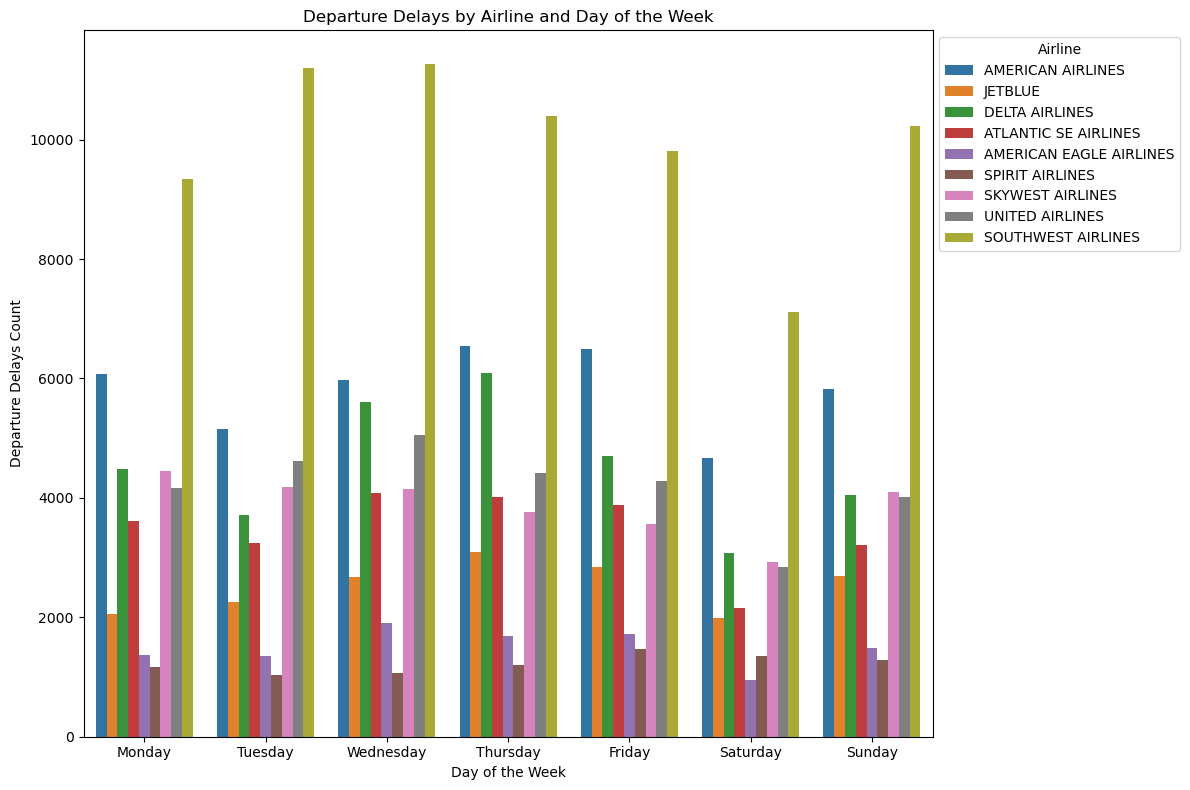

In [25]:
#create a df for top 9 airlines departure delays by airline and day of week 
top_9_departure_delays = grouped_data.groupby('AIRLINE')['DEPARTURE DELAYS TOTAL'].sum().nlargest(9)
grouped_top_9_delays = grouped_data[grouped_data['AIRLINE'].isin(top_9_departure_delays.index)]

#plot a bar plot for top 9 airlines departure delays by day of week
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE DELAYS TOTAL', hue='AIRLINE', data=grouped_top_9_delays)
plt.title('Departure Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Delays Count')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
plt.show()


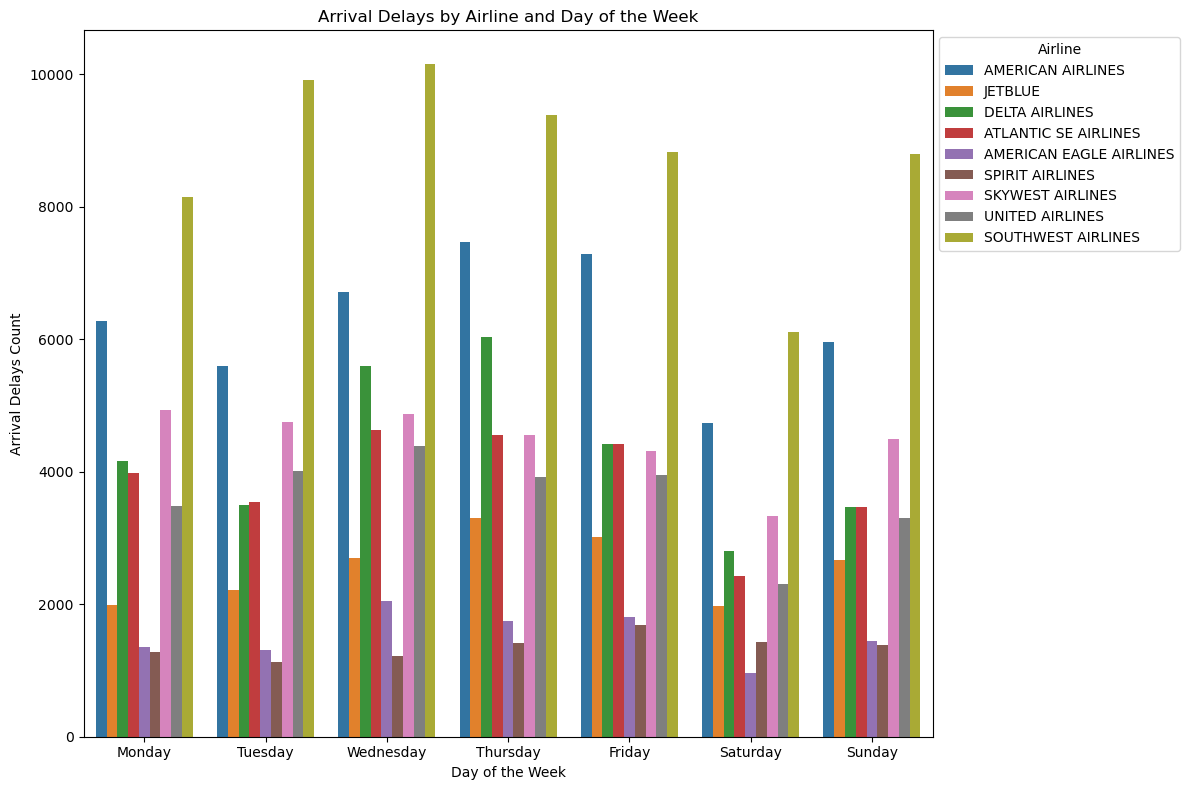

In [26]:
#create a df for top 9 airlines arrival delays by airline and day of week 
top_9_arrival_delays = grouped_data.groupby('AIRLINE')['ARRIVAL DELAYS TOTAL'].sum().nlargest(9)
grouped_top_9_arrivals = grouped_data[grouped_data['AIRLINE'].isin(top_9_arrival_delays.index)]


#plot a bar plot for top 9 airlines arrival delays by day of week
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL DELAYS TOTAL', hue='AIRLINE', data=grouped_top_9_arrivals)
plt.title('Arrival Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Arrival Delays Count')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
plt.show()

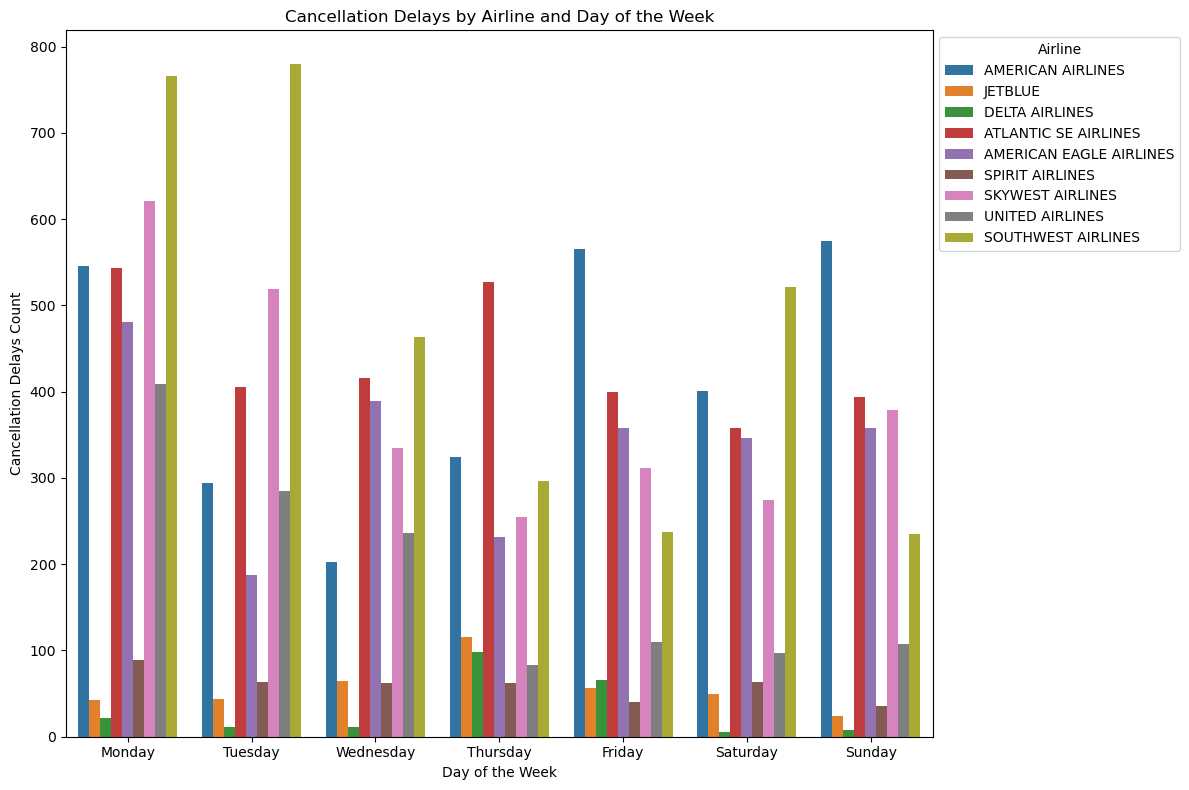

In [27]:
#create a df for top 9 airlines cancellations by airline and day of week
top_9_cancellations = grouped_data.groupby('AIRLINE')['CANCELLATION TOTAL'].sum().nlargest(9)
grouped_top_9_cancellations = grouped_data[grouped_data['AIRLINE'].isin(top_9_cancellations.index)]



#plot a bar plot for top 9 airlines cancellations by day of week
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='CANCELLATION TOTAL', hue='AIRLINE', data=grouped_top_9_cancellations)
plt.title('Cancellation Delays by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Delays Count')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
plt.show()

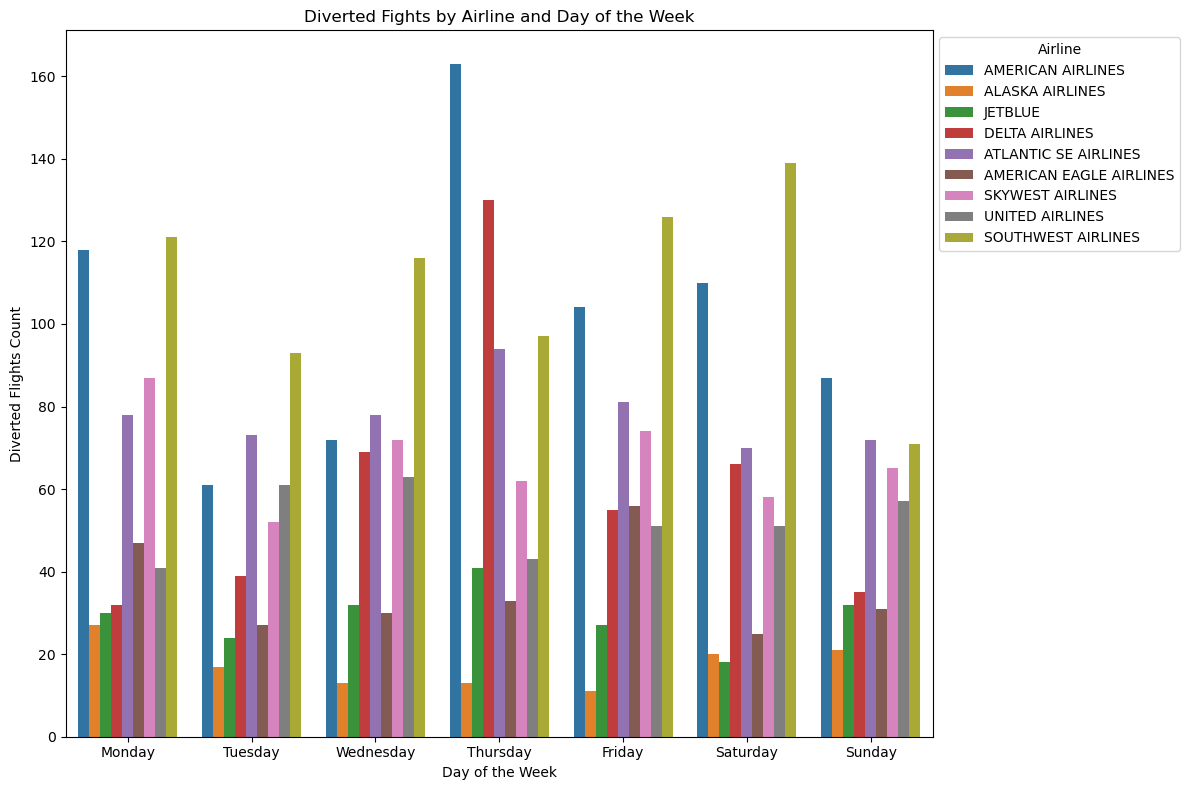

In [28]:
#create a df for top 9 airlines diverted flights by airline and day of week
top_9_diverted = grouped_data.groupby('AIRLINE')['DIVERTED TOTAL'].sum().nlargest(9)
grouped_top_9_diverted = grouped_data[grouped_data['AIRLINE'].isin(top_9_diverted.index)]


#plot a bar plot for top 9 airlines diverted flights by day of week
plt.figure(figsize=(12, 8))
sns.barplot(x='DAY_OF_WEEK', y='DIVERTED TOTAL', hue='AIRLINE', data=grouped_top_9_diverted)
plt.title('Diverted Fights by Airline and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Diverted Flights Count')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
plt.show()

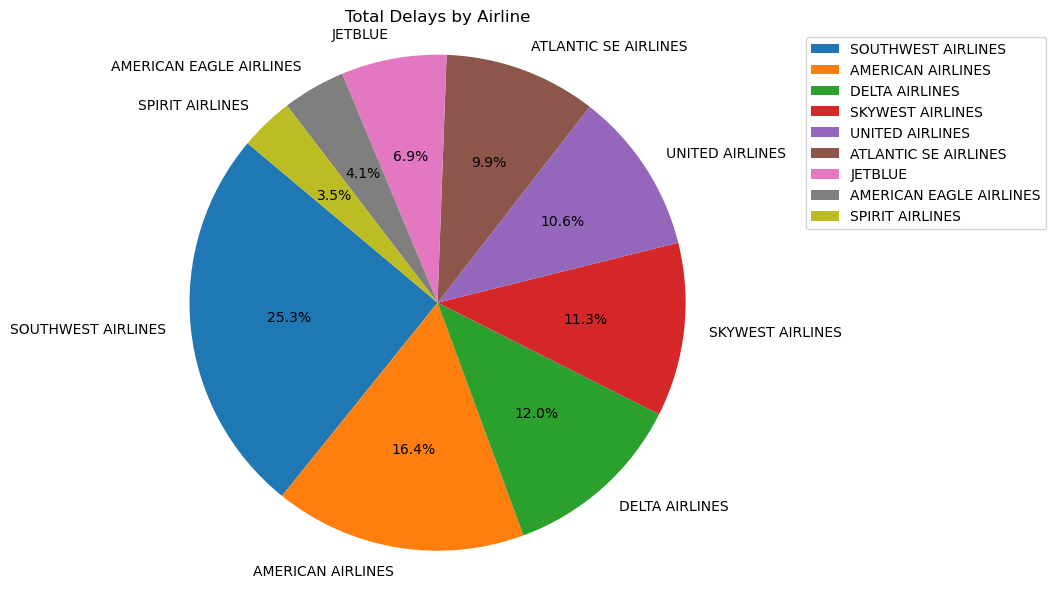

In [29]:
#create a df that sums all delayed, canceled and diverted flights into total delays
total_delays = grouped_data.groupby('AIRLINE').agg({
    'DEPARTURE DELAYS TOTAL': 'sum',
    'ARRIVAL DELAYS TOTAL': 'sum',
    'CANCELLATION TOTAL': 'sum',
    'DIVERTED TOTAL': 'sum'
})
#combine all summed columns into one total delays column
total_delays['TOTAL DELAYS'] = total_delays['DEPARTURE DELAYS TOTAL'] + total_delays['ARRIVAL DELAYS TOTAL'] 
+ total_delays['CANCELLATION TOTAL'] + total_delays['DIVERTED TOTAL']

#create top 9 airlines df based on descending value of total delays
top_9_airlines = total_delays.sort_values(by='TOTAL DELAYS', ascending=False).head(9)

#plot top 9 airline total delays in a pie chart 
plt.figure(figsize=(10, 6))
plt.pie(top_9_airlines['TOTAL DELAYS'], labels=top_9_airlines.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Delays by Airline')
plt.axis('equal') 
plt.legend(top_9_airlines.index, bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout() 
plt.show()

In [30]:
top_9_airlines

,DEPARTURE DELAYS TOTAL,ARRIVAL DELAYS TOTAL,CANCELLATION TOTAL,DIVERTED TOTAL,TOTAL DELAYS
AIRLINE,,,,,
SOUTHWEST AIRLINES,69352,61357,3298,763,130709
AMERICAN AIRLINES,40736,44008,2908,715,84744
DELTA AIRLINES,31714,29979,222,426,61693
SKYWEST AIRLINES,27118,31257,2695,470,58375
UNITED AIRLINES,29396,25348,1327,367,54744
ATLANTIC SE AIRLINES,24203,27024,3043,546,51227
JETBLUE,17610,17850,398,204,35460
AMERICAN EAGLE AIRLINES,10475,10665,2351,249,21140
SPIRIT AIRLINES,8557,9547,416,50,18104


<Figure size 1000x600 with 0 Axes>

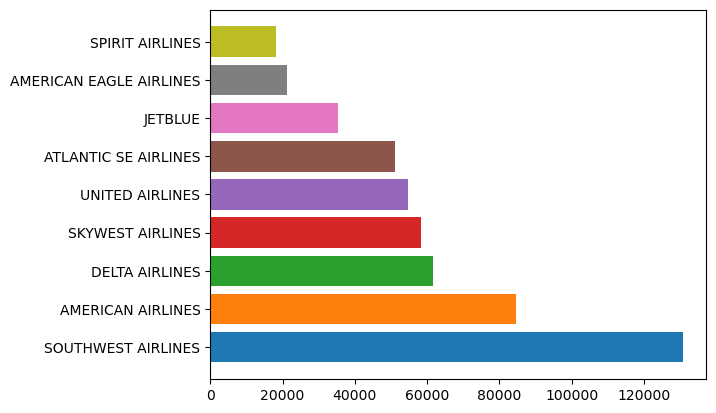

<Figure size 1000x600 with 0 Axes>

In [41]:
#set unique colors to each airline in top 9 airlines 
colors = cm.tab10(range(len(top_9_airlines)))
#plot top 9 airline total delays in a horizontal bar chart
plt.barh(top_9_airlines.index, top_9_airlines['TOTAL DELAYS'], color=colors)
plt.figure(figsize=(10, 6))

